In [1]:
#importer les bibliothèques
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

In [2]:
# ou créer une boucle pour importer les fichiers existants 
filenames=['products.csv','customers.csv','transactions.csv']
#boucle
df=[]
for filename in filenames:
    df.append(pd.read_csv(filename, engine='python', decimal='.', na_values='n/a', header=0,index_col=None))


In [3]:
#attribuer un nom aux données importées et créer une colonne 'table'
produit=df[0]
client=df[1]
vente=df[2]


### Nettoyage de données

In [4]:
produit.info()
produit.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
id_prod    3287 non-null object
price      3287 non-null float64
categ      3287 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,1_628,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [5]:
produit[produit['price'] < 0]

,id_prod,price,categ
731,T_0,-1.0,0


In [6]:
#supprimer la ligne 731 dont le prix est abérent
produit.drop([731],inplace=True)

In [7]:
produit.head(10)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
5,0_1163,9.99,0
6,1_463,36.99,1
7,0_2157,34.99,0
8,0_1915,16.99,0
9,0_389,18.99,0


In [8]:
client.info()
client['birth'] = pd.to_datetime(client['birth'], format='%Y')
#client['birth'].dt.to_period('Y')
#client['birth'].astype('datetime64[ns]')
client.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
client_id    8623 non-null object
sex          8623 non-null object
birth        8623 non-null int64
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


,client_id,sex,birth
0,c_4410,f,1967-01-01
1,c_7839,f,1975-01-01
2,c_1699,f,1984-01-01
3,c_5961,f,1962-01-01
4,c_5320,m,1943-01-01
5,c_415,m,1993-01-01
6,c_285,f,1967-01-01
7,c_160,f,1978-01-01
8,c_6446,m,1971-01-01
9,c_6866,m,1993-01-01


In [9]:
client.info()
client.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
client_id    8623 non-null object
sex          8623 non-null object
birth        8623 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 202.2+ KB


,client_id,sex,birth
count,8623,8623,8623
unique,8623,2,76
top,c_6845,f,2004-01-01 00:00:00
freq,1,4491,440
first,NaN,NaN,1929-01-01 00:00:00
last,NaN,NaN,2004-01-01 00:00:00


In [10]:
#client.head()
#type 
client['birth'].astype(int)
client.head()

,client_id,sex,birth
0,c_4410,f,1967-01-01
1,c_7839,f,1975-01-01
2,c_1699,f,1984-01-01
3,c_5961,f,1962-01-01
4,c_5320,m,1943-01-01


In [11]:
type(client['birth'][0])
client['birthyear']=client['birth'].dt.year
client.head()

,client_id,sex,birth,birthyear
0,c_4410,f,1967-01-01,1967
1,c_7839,f,1975-01-01,1975
2,c_1699,f,1984-01-01,1984
3,c_5961,f,1962-01-01,1962
4,c_5320,m,1943-01-01,1943


In [12]:
#compter le nb des données ex sexe 
#boucle for pour compter les années de naissance
clientDESC=client.groupby('birthyear').count().sort_values(by=['birthyear'], ascending=False)
clientDESC.count()

client_id    76
sex          76
birth        76
dtype: int64

In [13]:
clientSex=client.groupby(['birthyear', 'sex']).count()
clientSex.reset_index(inplace=True)
clientSex.head()


,birthyear,sex,client_id,birth
0,1929,f,1,1
1,1929,m,2,2
2,1930,f,3,3
3,1930,m,1,1
4,1931,f,2,2


In [14]:
#reindexer 
clientDESC.reset_index(inplace=True)

### beaucoup de clients ont 18 ans en 2004 : 
1/ Je n'utilise pas les données de 2004 parce qu'elles sont trop abhérentes sur l'ensemble de l'échantillon

2/ une campagne de marketing pour attirer les jeunes lecteurs de 18 ans





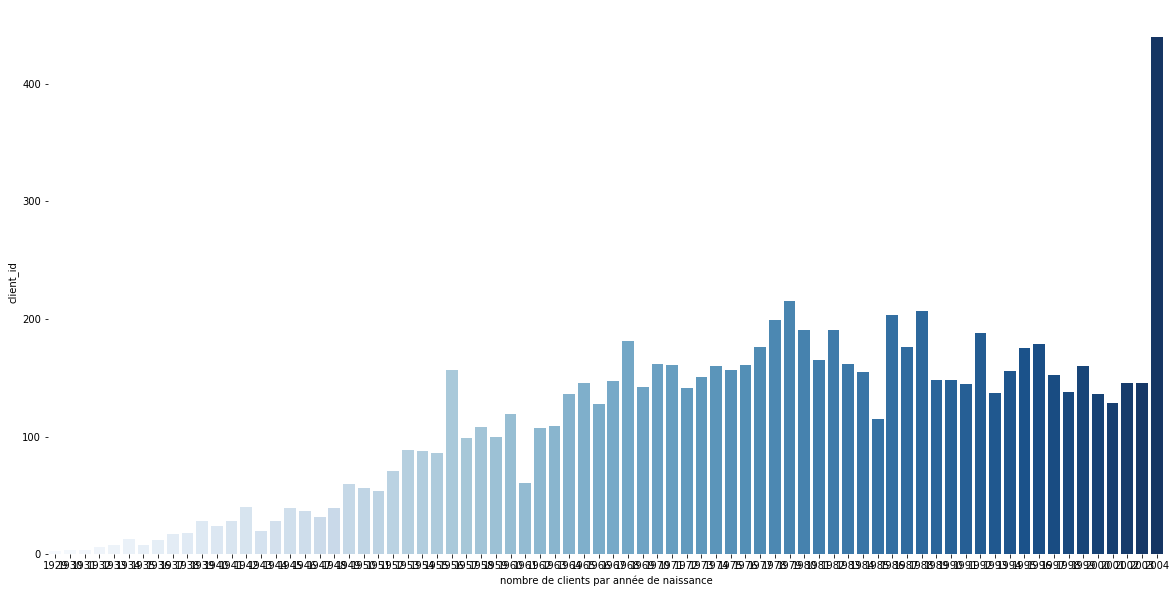

In [15]:
#observations des échantillons par année de naissance
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x="birthyear", y="client_id", data=clientDESC,palette="Blues", order=None)
ax.set(#xlim="", ylabel="",
       xlabel="nombre de clients par année de naissance")
sns.despine(left=True, bottom=True)
plt.show()

### nombreux clients récemment inscrits

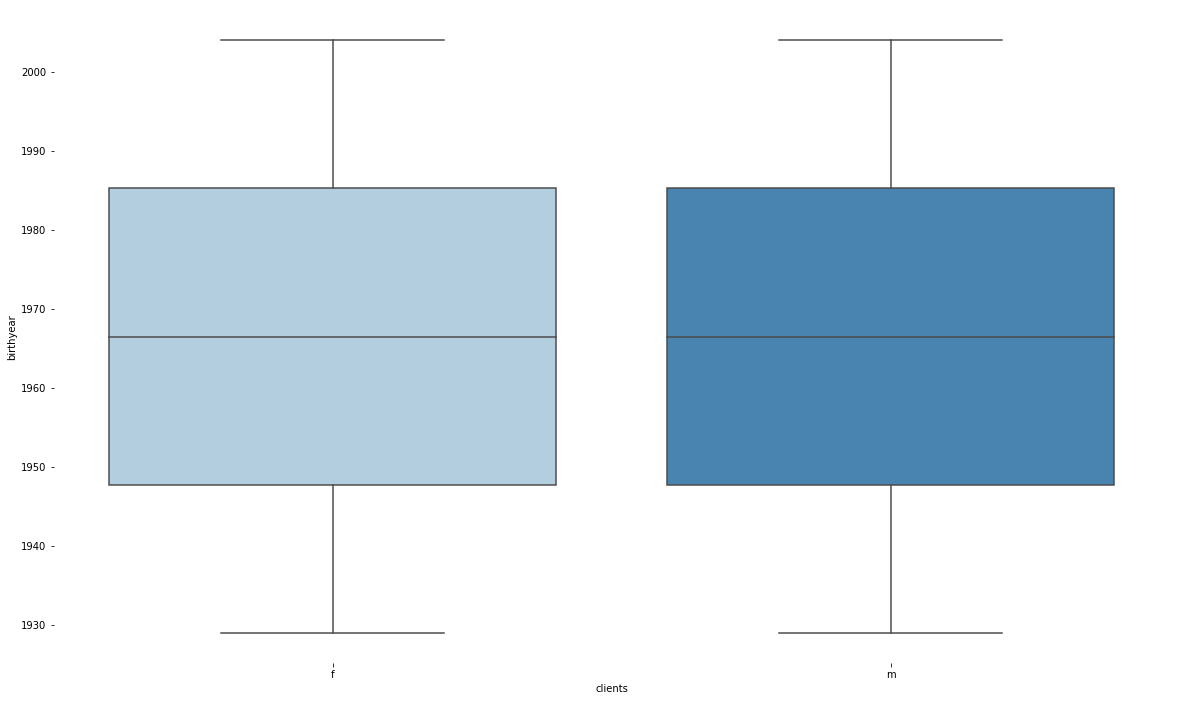

In [16]:
#observations des échantillons par client ID
f, ax = plt.subplots(figsize=(20, 12))
ax = sns.boxplot(y="birthyear", x="sex", data=clientSex,palette="Blues", order=None)
ax.set(#xlim=(0,100), ylabel="",
       xlabel="clients")
sns.despine(left=True, bottom=True)
plt.show()

In [17]:
#compter le nb des données de sexe 
#boucle for pour compter les années de naissance
clientDESC1=client.groupby('sex').count().sort_values(by=['sex'], ascending=False)
clientDESC1.count()

client_id    2
birth        2
birthyear    2
dtype: int64

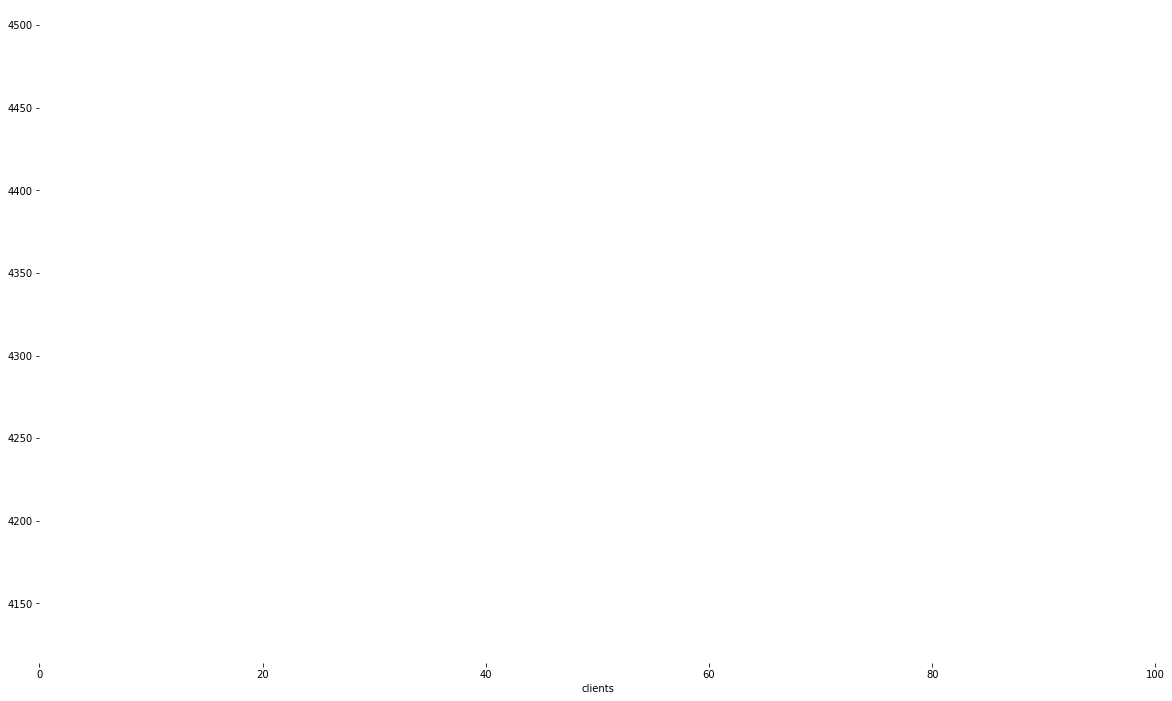

In [18]:
#observations des échantillons par année de naissance
f, ax = plt.subplots(figsize=(20, 12))
ax = sns.scatterplot(x="client_id", y="birthyear", data=clientDESC1,palette="Blues")
ax.set(xlim=(0,100), ylabel="",
      xlabel="clients")
sns.despine(left=True, bottom=True)
plt.show()

In [19]:
#groupement par tranche subset
#clientDESC.

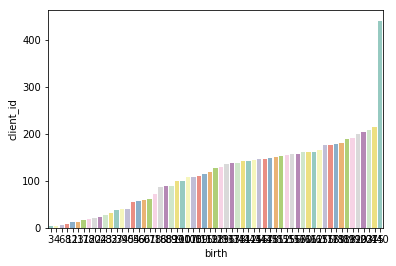

In [20]:
sns.barplot( x='birth', y='client_id', hue=None, data=clientDESC, palette="Set3")
plt.show()

In [21]:
vente.info()
vente.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
id_prod       337016 non-null object
date          337016 non-null object
session_id    337016 non-null object
client_id     337016 non-null object
dtypes: object(4)
memory usage: 10.3+ MB


,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


### les lignes dont la date contient test

In [22]:
#les lignes dont la date contient test
vente_test=vente[vente['date'].str.contains('test', na=False)].index
vente_test

Int64Index([  1431,   2365,   2895,   5955,   7283,  13745,  20470,  22347,
             26359,  26407,
            ...
            328925, 329634, 330454, 331787, 332163, 332594, 332705, 332730,
            333442, 335279],
           dtype='int64', length=200)

In [23]:
# enlever les lignes qui contiennent test
vente.drop(vente_test , inplace=True)

In [24]:
vente['date'] = pd.to_datetime(vente['date'], format='%Y-%m-%d %H:%M:%S.%f')
vente.info()
vente.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 337015
Data columns (total 4 columns):
id_prod       336816 non-null object
date          336816 non-null datetime64[ns]
session_id    336816 non-null object
client_id     336816 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 12.8+ MB


,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [25]:
# compter le nb des données ex sexe 

In [26]:
vente.describe(include='all')


,id_prod,date,session_id,client_id
count,336816,336816,336816,336816
unique,3265,336816,169194,8600
top,1_369,2021-06-30 11:35:55.387896,s_118668,c_1609
freq,1081,1,14,12855
first,NaN,2021-03-01 00:01:07.843138,NaN,NaN
last,NaN,2022-02-28 23:59:58.040472,NaN,NaN


In [27]:
vente.count()

id_prod       336816
date          336816
session_id    336816
client_id     336816
dtype: int64

### Mission n° 2 : Ensuite, vous réaliserez l’analyse des données. Une grande liberté vous est laissée sur ce plan, mais à vous de trouver les informations qui ont du sens pour mieux comprendre les ventes.

Vous devrez y utiliser au moins :

des indicateurs de tendance centrale et de dispersion ;
une analyse de concentration, via une courbe de Lorenz et un indice de Gini ;
des représentations graphiques, dont au moins un histogramme, une représentation avec des "boîtes à moustaches", et une représentation de série temporelle (c’est-à-dire un graphique dont l’axe des abscisses représente des dates) ;
des analyses bivariées.


### 1-des indicateurs de tendance centrale et de dispersion

In [28]:
produit.describe(include='all')

,id_prod,price,categ
count,3286,3286.000000,3286.000000
unique,3286,NaN,NaN
top,1_628,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.863597,0.370359
std,NaN,29.849786,0.615446
min,NaN,0.620000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.075000,0.000000
75%,NaN,22.990000,1.000000


/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


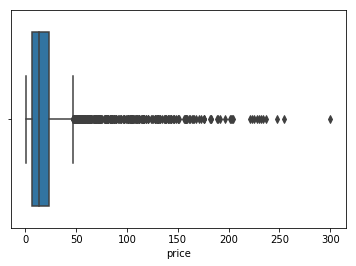

In [29]:
sns.boxplot(produit.price, hue=None)
plt.show()
#sns.boxplot( x='categ', y='price', hue=None, data=vente, palette="Set3")

### catégories selon les prix

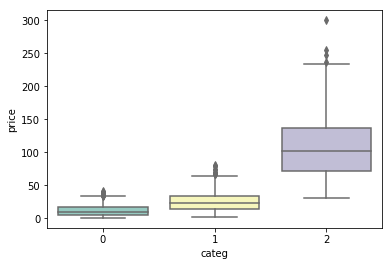

In [30]:
sns.boxplot( x='categ', y='price', hue=None, data=produit, palette="Set3")
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


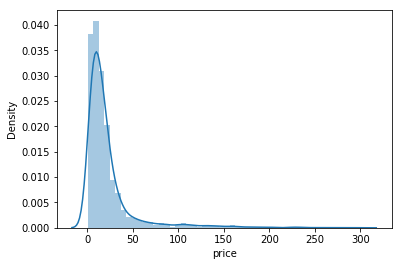

In [31]:
#répartition des prix : montrer les outlayers qui se trouve au-delà de 250 euros (valeurs abhérentes)
sns.distplot(produit.price)
plt.show()

In [32]:
vente.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [33]:
produit.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


### fusion BDD produit et vente

In [34]:
VenteProd=vente.merge(right=produit,left_on='id_prod', right_on='id_prod')

In [35]:
VenteProd.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0


### 2- Y a-t-il une corrélation entre l'âge des clients et :

### Le montant total des achats

In [36]:
TotalpanierClt=VenteProd[['client_id','price']].groupby('client_id').sum(skipna=True)

In [37]:
TotalpanierClt.head()

,price
client_id,
c_1,300.65
c_10,586.18
c_100,222.87
c_1000,980.02
c_1001,1102.45


In [38]:
#del TotalpanierClt

In [39]:
TotalpanierClt.reset_index()
TotalpanierClt_prix=TotalpanierClt.sort_values(by=['price'], ascending=False)

In [40]:
TotalpanierClt_prix.reset_index(inplace=True)

In [41]:
TotalpanierClt_prix.head(20)

,client_id,price
0,c_1609,162007.34
1,c_4958,144257.21
2,c_6714,73197.34
3,c_3454,54442.92
4,c_7959,2564.25
5,c_4491,2540.53
6,c_8026,2537.67
7,c_2140,2527.01
8,c_8392,2515.98
9,c_7421,2511.98


In [42]:
#sns.barplot( x='price', y='client_id', hue=None, data=TotalpanierClt_prix, palette="Set3")
#plt.show()

In [43]:
#observations des échantillons par prix Total
#f, ax = plt.subplots(figsize=(20, 10))
#ax = sns.barplot(x="price", y="client_id", data=TotalpanierClt_prix,palette="Blues", order=None)
#ax.set(#xlim="", ylabel="",
#       xlabel="Total Panier")
#sns.despine(left=True, bottom=True)
#plt.show()

In [44]:
TotalpanierClt_prix.describe(include='all')

,client_id,price
count,8600,8600.000000
unique,8600,NaN
top,c_226,NaN
freq,1,NaN
mean,NaN,674.020671
std,NaN,2565.848732
min,NaN,4.150000
25%,NaN,275.765000
50%,NaN,501.310000
75%,NaN,870.650000


/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


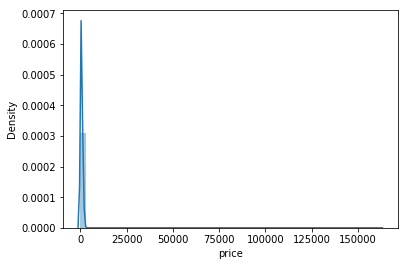

In [45]:
#répartition des prix : montrer les outlayers qui se trouve au-delà de 250 euros (valeurs abhérentes)
sns.distplot(TotalpanierClt.price)
plt.show()

In [46]:
#sns.scatterplot( x='id_prod',y='price', hue='price', hue_order='price', data=vente, palette="Set3")
#plt.show()
#vente.plot(kind="scatter",     # Create a scatterplot
             # x="price",          # Put carat on the x axis
             # y="id_prod",          # Put price on the y axis
             # figsize=(10,10),
             # ylim=(0,20000))  

In [47]:
#sns.scatterplot( x='categ', y='price', hue='categ', data=vente, hue_order=None)
#plt.show()

In [48]:
# Create a count plot with "VENTE" on the x-axis
#sns.countplot(x='categ', data=vente)

# Display the plot
#plt.show()

### Courbe de Lorenz : catégorie de produit les plus vendus
Graphical Representation of the Gini Index (Lorenz curve)

The Gini coefficient is usually defined mathematically based on the Lorenz curve, which plots the proportion of the total income of the population (y-axis) that is cumulatively earned by the bottom x% of the population.
The line at 45 degrees thus represents perfect equality of incomes.

![alt text](0_x7xT12FEVqHft3Jq.png  "Intéprétation")



### The Gini coefficient can then be thought of as the ratio of the area that lies between the line of equality and the Lorenz curve (marked A in the diagram(Titled Figure below) over the total area under the line of equality (marked A and B in the diagram ); i.e., G = A / (A + B). It is also equal to 2A and to 1–2B due to the fact that A + B = 0.5 (since the axes scale from 0 to 1).

The Gini index is often represented graphically through the Lorenz curve, which shows income (or wealth) distribution by plotting the population percentile by income on the horizontal axis and cumulative income on the vertical axis.

The Gini coefficient is equal to the area below the line of perfect equality (0.5 by definition) minus the area below the Lorenz curve, divided by the area below the line of perfect equality. In other words, it is double the area between the Lorenz curve and the line of perfect equality.

Another way of thinking about the Gini coefficient is as a measure of deviation from perfect equality. The further a Lorenz curve deviates from the perfectly equal straight line (which represents a Gini coefficient of 0), the higher the Gini coefficient and the less equal the society.

![alt text](0_RCLJP5gEy1YCA-tu.png "Intéprétation")


### répartitions

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


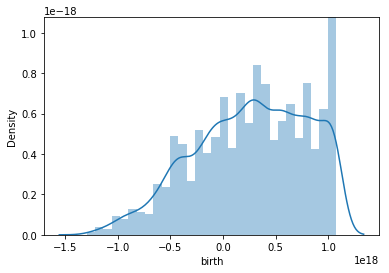

In [49]:
#répartition des clients
sns.distplot(client.birth)
plt.show()

### Mission n° 3 : Voici quelques questions supplémentaires, que votre manager vous a posées :

1- Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

2- Y a-t-il une corrélation entre l'âge des clients et :

Le montant total des achats ;

La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;

La taille du panier moyen (en nombre d’articles) ;

Les catégories de produits achetés.

### 1- Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

- étude de la BDD session en représentation graphique 
- 

In [50]:
#sns.regplot( x='client_id', y='id_prod',  data=session);
#plt.show()

### 2- Y a-t-il une corrélation entre l'âge des clients et :
Le montant total des achats ;

La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;

La taille du panier moyen (en nombre d’articles) ;

Les catégories de produits achetés.

### rattacher les trois bases de données

In [51]:
#sns.jointplot(x='client_id', y='id_prod', data=session, kind="reg");
#plt.show()

In [56]:
#fusionner les fichiers animaux et vegetaux
#créer une seule base de données ”AlimentTyp”
df=[ produit, vente, client] 
Bdd=pd.concat(df) #sort='Zone' ignore_index=True , ignore_index=True join='outer' keys=['Code zone','Nb_SousAlim','Nb_d_Hab_en_millions']

#description
#Prop_sousAlim_Monde=Prop_sousAlim.pivot_table(Prop_sousAlim, index=[ 'Zone', 'Code zone', 'Année', 'Unité' ])#values='Valeur',  columns='Élément', margins=True
                     

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [53]:
Bdd.describe(include= 'all')

,birth,birthyear,categ,client_id,date,id_prod,price,session_id,sex
count,8623,8623.000000,3286.000000,345439,336816,340102,3286.000000,336816,8623
unique,76,NaN,NaN,8623,336816,3287,NaN,169194,2
top,2004-01-01 00:00:00,NaN,NaN,c_1609,2021-06-30 11:35:55.387896,1_369,NaN,s_118668,f
freq,440,NaN,NaN,12856,1,1082,NaN,14,4491
first,1929-01-01 00:00:00,NaN,NaN,NaN,2021-03-01 00:01:07.843138,NaN,NaN,NaN,NaN
last,2004-01-01 00:00:00,NaN,NaN,NaN,2022-02-28 23:59:58.040472,NaN,NaN,NaN,NaN
mean,NaN,1978.280877,0.370359,NaN,NaN,NaN,21.863597,NaN,NaN
std,NaN,16.919535,0.615446,NaN,NaN,NaN,29.849786,NaN,NaN
min,NaN,1929.000000,0.000000,NaN,NaN,NaN,0.620000,NaN,NaN
25%,NaN,1966.000000,0.000000,NaN,NaN,NaN,6.990000,NaN,NaN


In [54]:
Bdd.head(200)

,birth,birthyear,categ,client_id,date,id_prod,price,session_id,sex
0,NaT,NaN,0.0,NaN,NaT,0_1421,19.99,NaN,NaN
1,NaT,NaN,0.0,NaN,NaT,0_1368,5.13,NaN,NaN
2,NaT,NaN,0.0,NaN,NaT,0_731,17.99,NaN,NaN
3,NaT,NaN,1.0,NaN,NaT,1_587,4.99,NaN,NaN
4,NaT,NaN,0.0,NaN,NaT,0_1507,3.99,NaN,NaN
5,NaT,NaN,0.0,NaN,NaT,0_1163,9.99,NaN,NaN
6,NaT,NaN,1.0,NaN,NaT,1_463,36.99,NaN,NaN
7,NaT,NaN,0.0,NaN,NaT,0_2157,34.99,NaN,NaN
8,NaT,NaN,0.0,NaN,NaT,0_1915,16.99,NaN,NaN
9,NaT,NaN,0.0,NaN,NaT,0_389,18.99,NaN,NaN


In [55]:
Bdd.tail(100)

,birth,birthyear,categ,client_id,date,id_prod,price,session_id,sex
8523,1956-01-01,1956.0,NaN,c_4657,NaT,NaN,NaN,NaN,f
8524,2003-01-01,2003.0,NaN,c_7365,NaT,NaN,NaN,NaN,m
8525,1962-01-01,1962.0,NaN,c_2962,NaT,NaN,NaN,NaN,m
8526,1957-01-01,1957.0,NaN,c_5300,NaT,NaN,NaN,NaN,f
8527,2002-01-01,2002.0,NaN,c_5666,NaT,NaN,NaN,NaN,m
8528,1986-01-01,1986.0,NaN,c_4682,NaT,NaN,NaN,NaN,f
8529,1984-01-01,1984.0,NaN,c_2342,NaT,NaN,NaN,NaN,m
8530,1992-01-01,1992.0,NaN,c_6925,NaT,NaN,NaN,NaN,f
8531,1969-01-01,1969.0,NaN,c_4939,NaT,NaN,NaN,NaN,f
8532,1991-01-01,1991.0,NaN,c_8080,NaT,NaN,NaN,NaN,m
